<div class='alert alert-success'>
Cual es la probabilidad de que un <b>tweet</b> originado dentro de las coordenadas geográficas (-78.31, 0.44, -70.71, 11.39) contenga la palabra "yo"
https://apps.twitter.com 
</div>

In [16]:
import os
import tweepy
from tweepy import Stream
from stream_listener import FiniteStreamListener

## Creamos credenciales

In [26]:
COMSUMER_KEY = 'fublNqKj8rPaZzuTe5mKCZb6A'
CONSUMER_SECRET = 'vuvhZ4luo1nYE33rH6ZsMQSwnIEsZvUHE2HjQXAWKjuvhIcmRp'
ACCESS_TOKEN = '836053310499090433-6wMLRyI27VKS2YWcU5KkgJngi8uDa9d'
ACCESS_TOKEN_SECRET = 'vlMH1mxsYoj142Nj3y9s7P56voM9POfZnhmu6oa7vJRwD'

In [27]:
COLOMBIA_BOX = [-78.31, 0.44, -70.71, 11.39]
NUMBER_OF_TWEETS = 100

In [28]:
auth = tweepy.OAuthHandler(COMSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

## Establecer concecion con el API de twiter

In [29]:
finite_stream_listener = FiniteStreamListener(number_of_tweets=NUMBER_OF_TWEETS)
streaming_api = Stream(auth=auth, listener=finite_stream_listener)

## Sorber del firehouse

In [30]:
streaming_api.filter(locations=COLOMBIA_BOX)

## Limpar los datos.

In [31]:
from unidecode import unidecode

### Definimos las funciones de limpieza.

In [32]:
def make_lowercase(tweet):
    return tweet.lower()

def remove_diacritics(tweet):
    return unidecode(tweet)

def remove_non_alpha_characteres(tweet):
    return ''.join(c for c in tweet if c.isalpha() or c == ' ')

## Aplicar las funciones.

In [35]:
cleaned_data = list(finite_stream_listener.tweets)

for cleaning_function in [make_lowercase, remove_diacritics, remove_non_alpha_characteres]:
    cleaned_data = [cleaning_function(tweet) for tweet in cleaned_data]

## Dormir con los datos

In [56]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
KEYWORD = 'yo'

In [42]:
pprint(cleaned_data[:10])

['una comunidad httpstcothgmfxzokf',
 'alexanet buenas tardes senora alexanet estamos verificando informacion '
 'solicitada en unos minutos le responderemos',
 'nuevo apple iphone iphoneplus iphone iphoneplus iphonexdisponible con '
 'garantia  ano httpstcocuiteox',
 'venezhipica pone k en holfburg antes rayandyar httpstcofnyffcgsl',
 'diegoasantos por dios se esta creando la revolucion del odio y de los '
 'insultos ya basta que aprendan a respetar',
 'hoy junior se juega todo vamos q vamos tiburon atleticojunior',
 'definitivamente todos tienen una parte del pastel lo que pasa es que lo '
 'quieren todo httpstcokuppmrlv',
 'menos mal en mi casa ninguno por duque ni lleras menos mal '
 'httpstcounkpvihjpg',
 'alvarouribevel adnradiochile fidel yo no soy comunista  ynscchavez ynscpetro '
 'ynscca httpstcoowpeolhv',
 'hay muchas personas criticando al gobierno quisiera saber en realidad ademas '
 'de todas las criticas y protestas tienen alguna solucion']


## Cuantas veces aparece la palabra clave?

In [43]:
number = sum(KEYWORD in tweet for tweet in cleaned_data)
print('La palabra clave aparece {} veces'.format(number))

La palabra clave aparece 6 veces


### Con que frecuencia apareció?

In [45]:
print('Apareció en el {}% de los 100 tweets.'.format(100*number/100))

Apareció en el 6.0% de los 100 tweets.


### Como son los tweets que contienen la palabra clave?

In [48]:
pprint([t for t in cleaned_data if KEYWORD in t])

['alvarouribevel adnradiochile fidel yo no soy comunista  ynscchavez ynscpetro '
 'ynscca httpstcoowpeolhv',
 'si el meme de mayo sera gru okay',
 'robertothomasd ah its alright yo ya toy loving for it tambien so its all '
 'good',
 'efectococuyo y porque no lo hace ya  y estos  anos que  cinico  ud no tiene '
 'calificativos el presidente mas i httpstcobqkgskgrn',
 'aperovic liliethhh danibarranco jajajajajajaja bueno pero yo veo los de ig',
 'yo me sentia en vacaciones ya ']


### Cual es la distancia promedio entre las ocurrencias?

In [49]:
inice_tweet_keyword = [index for index, tweet in enumerate(cleaned_data) if KEYWORD in tweet]

In [50]:
inice_tweet_keyword

[8, 32, 43, 51, 95, 96]

In [52]:
distance = [index2 - index1 for index1, index2 in \
            zip(inice_tweet_keyword[:-1],inice_tweet_keyword[1:])]

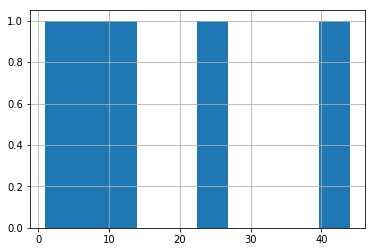

In [57]:
pd.Series(distance).hist()

## Construir un modelo 

In [58]:
from scipy.stats import beta
import numpy as np

### Definir los parámetros de la distribucion beta.

In [60]:
alpha = 1 + number
betta = 1 + (NUMBER_OF_TWEETS - number)

x_values = np.linspace(0, 1, 1002)[1:-1]
pdf_y_values = beta(alpha, betta).pdf(x_values)
cdf_y_values = np.cumsum(pdf_y_values) / np.sum(pdf_y_values)

### visualizacion

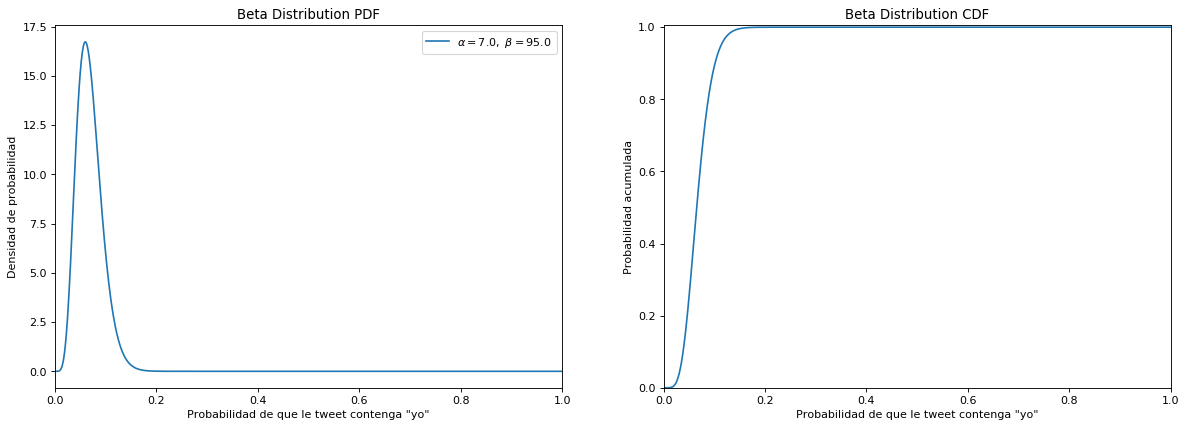

In [66]:
plt.figure(figsize=(18, 6), dpi=80);

# PDF
plt.subplot(121)
plt.plot(x_values, pdf_y_values, label=(r'$\alpha=%0.1f,\ \beta=%0.1f$' % (alpha, betta)))
plt.xlim(0 , 1)
plt.xlabel('Probabilidad de que le tweet contenga "yo"')
plt.ylabel('Densidad de probabilidad')
plt.title('Beta Distribution PDF')
plt.legend(loc=0)

# CDF
plt.subplot(122)
plt.plot(x_values, cdf_y_values)
plt.xlim(0 , 1)
plt.ylim(0, 1.005)
plt.xlabel('Probabilidad de que le tweet contenga "yo"')
plt.ylabel('Probabilidad acumulada')
plt.title('Beta Distribution CDF')

plt.show()

Cuantificamos la insertidumbre de la probabilidad con esta distribucion.

## Validar el modelo